In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Data Preprocessing
This step includes removing columns, filtering by deparment, indexing with time series data, aggregate sales data from hourly to monthly and removing missing values

In [2]:
# Load the cleaned sales dataset and check dtype of time series data 
data = pd.read_csv("sales_clean.csv")
data.head(n=10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Department Name          180519 non-null  object 
 1   order date (DateOrders)  180519 non-null  object 
 2   Order Item Total         180519 non-null  float64
dtypes: float64(1), object(2)
memory usage: 4.1+ MB


In [3]:
# set time index for time series data
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data.set_index('order date (DateOrders)', inplace=True)
data.index

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [4]:
# brief overview of dataset and distribution of each department, then choose the top department fan shop for the time series analysis and statistical forecasting model
data['Department Name'] = data['Department Name'].astype('category')
data['Department Name'].value_counts()

Fan Shop              66861
Apparel               48998
Golf                  33220
Footwear              14525
Outdoors               9686
Fitness                2479
Discs Shop             2026
Technology             1465
Pet Shop                492
Book Shop               405
Health and Beauty       362
Name: Department Name, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180519 entries, 2018-01-31 22:56:00 to 2016-01-15 18:54:00
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Department Name   180519 non-null  category
 1   Order Item Total  180519 non-null  float64 
dtypes: category(1), float64(1)
memory usage: 2.9 MB


In [6]:
#Split file by department name, and taking Fanshop for analysis as it's top sales department
Fanshop = data.loc[data['Department Name'] == 'Fan Shop']
Fanshop = Fanshop.groupby('order date (DateOrders)')['Order Item Total'].sum().reset_index()
Fanshop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41303 entries, 0 to 41302
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order date (DateOrders)  41303 non-null  datetime64[ns]
 1   Order Item Total         41303 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 645.5 KB


In [7]:
# set time index and aggregate the sales data as monthly with month start date
Fanshop.set_index('order date (DateOrders)', inplace=True)
y = Fanshop['Order Item Total'].resample('MS').mean()

In [8]:
y['2015':]

order date (DateOrders)
2015-01-01    376.655576
2015-02-01    371.710769
2015-03-01    373.832458
2015-04-01    378.634187
2015-05-01    366.927089
2015-06-01    380.724331
2015-07-01    368.650769
2015-08-01    370.859524
2015-09-01    381.653535
2015-10-01    374.864460
2015-11-01    389.016688
2015-12-01    372.661211
2016-01-01    374.132738
2016-02-01    375.758335
2016-03-01    376.828919
2016-04-01    376.734999
2016-05-01    370.986756
2016-06-01    379.554787
2016-07-01    382.121142
2016-08-01    373.382692
2016-09-01    364.215665
2016-10-01    377.216243
2016-11-01    387.231552
2016-12-01    371.189846
2017-01-01    367.286053
2017-02-01    385.731028
2017-03-01    371.902455
2017-04-01    383.106296
2017-05-01    378.730938
2017-06-01    385.588780
2017-07-01    378.972727
2017-08-01    384.745492
2017-09-01    394.027790
2017-10-01    322.610734
2017-11-01           NaN
2017-12-01     10.367787
2018-01-01     10.371848
Freq: MS, Name: Order Item Total, dtype: float64

In [9]:
# missing value hanlding by using the 3 years average sales 
y = y.fillna(y.mean())
y = y['2015-01-01':'2017-09-01',]

Visualizing the sales time series data

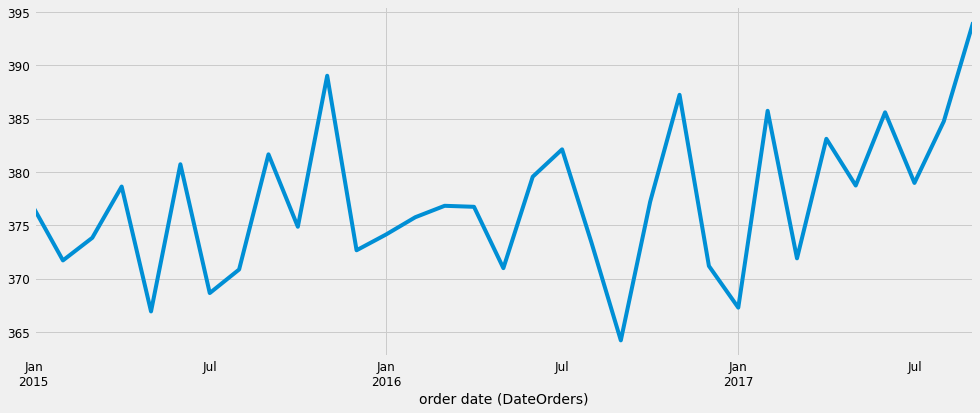

In [10]:
# Plot the time series data over the past 3 years 
y.plot(figsize=(15, 6))
plt.show()

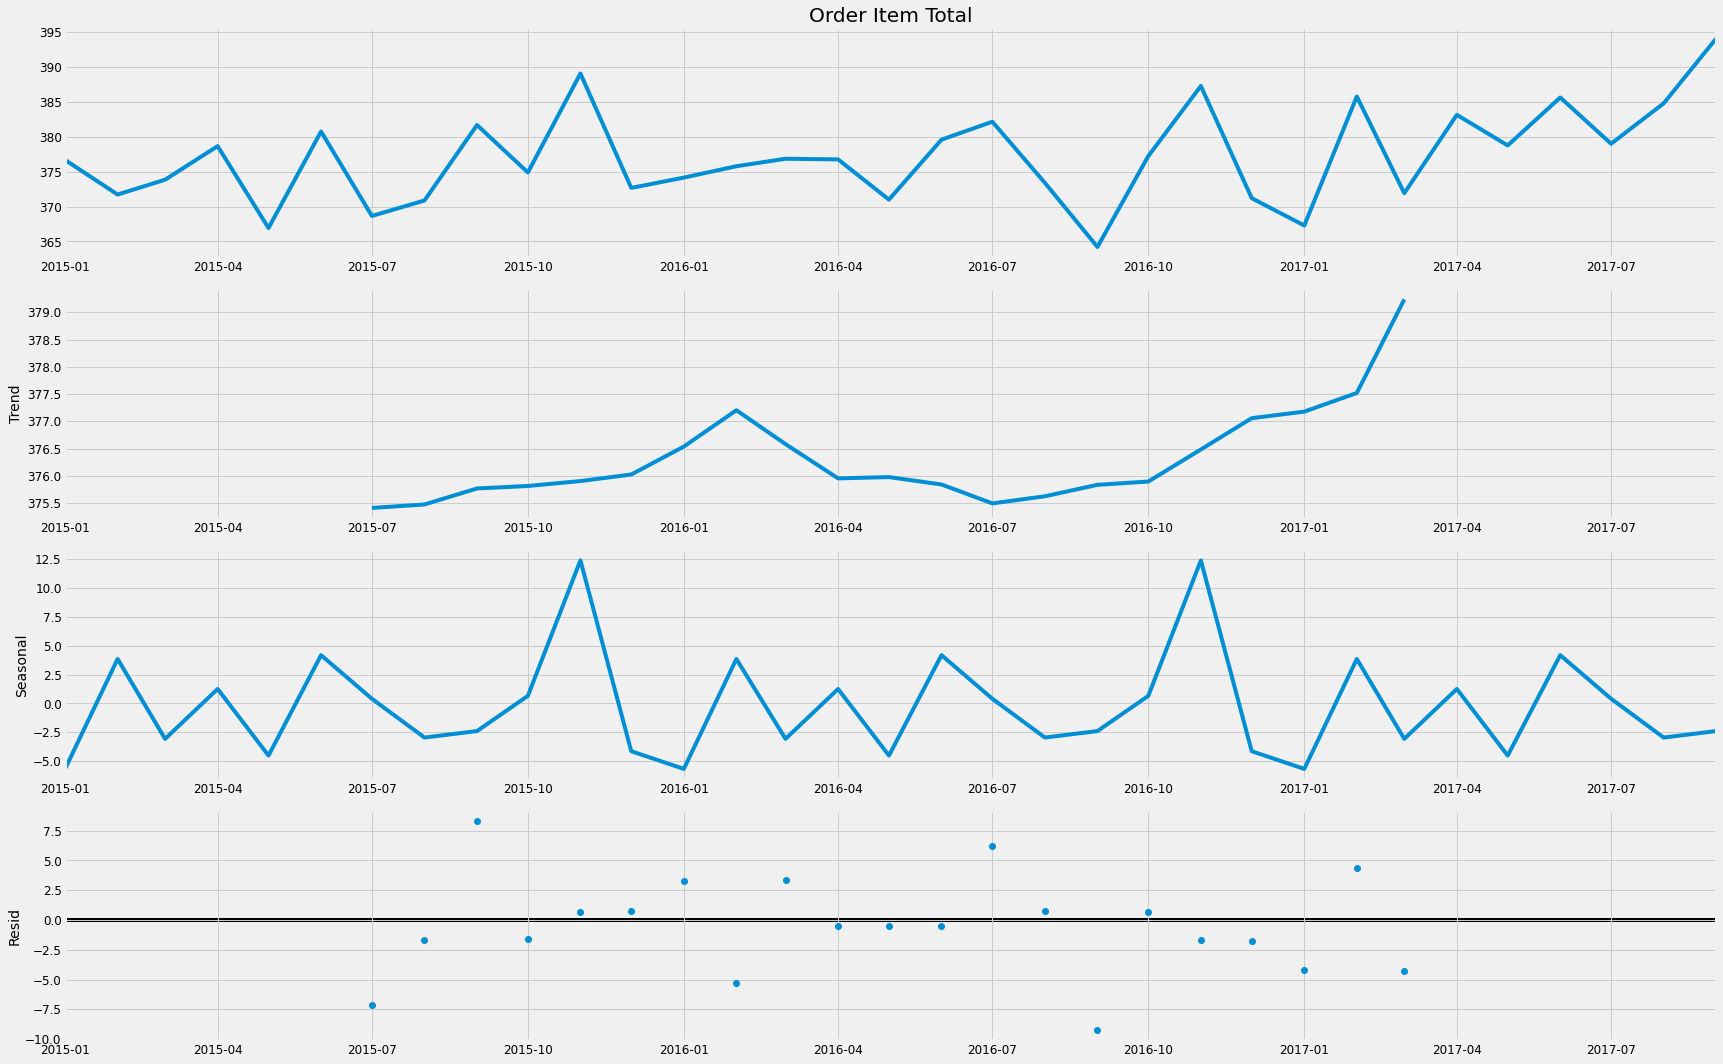

In [11]:
# visualize the data using the method called time-series decomposition that allows us to decompose our time series into three distince components: trend, seasonality and noise
# From below chart, it clearly shows that the sales from department fanshop is fluectuating throughout the year with obvious seasonality (peak of order sales around Nov)
from pylab import rcParams
rcParams['figure.figsize'] = 24, 15
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Time series forecasting with SARIMA 

In [12]:
#ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [13]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:472.5127892884884
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:288.3274264671697
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:149.6761489883326
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:64.73528605579874
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:156.26376732997647
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:144.85672679207622
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:71.14024807387229
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:65.83329492496487
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:460.2036669575991
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:277.28831402693584
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:144.74709626139978
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Ma

Fitting the model

In [20]:
# ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:43.821014927015106 which is the lowest AIC, thus it's suggested that we consider this to be optimal option
# Then fit the ARIMA model,enforce_stationarity=False,
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7119      0.491     -1.451      0.147      -1.673       0.250
ar.S.L12      -0.6609   9227.465  -7.16e-05      1.000   -1.81e+04    1.81e+04
ma.S.L12       0.0821   1.48e+04   5.55e-06      1.000    -2.9e+04     2.9e+04
sigma2        53.3146   4.84e+04      0.001      0.999   -9.47e+04    9.48e+04


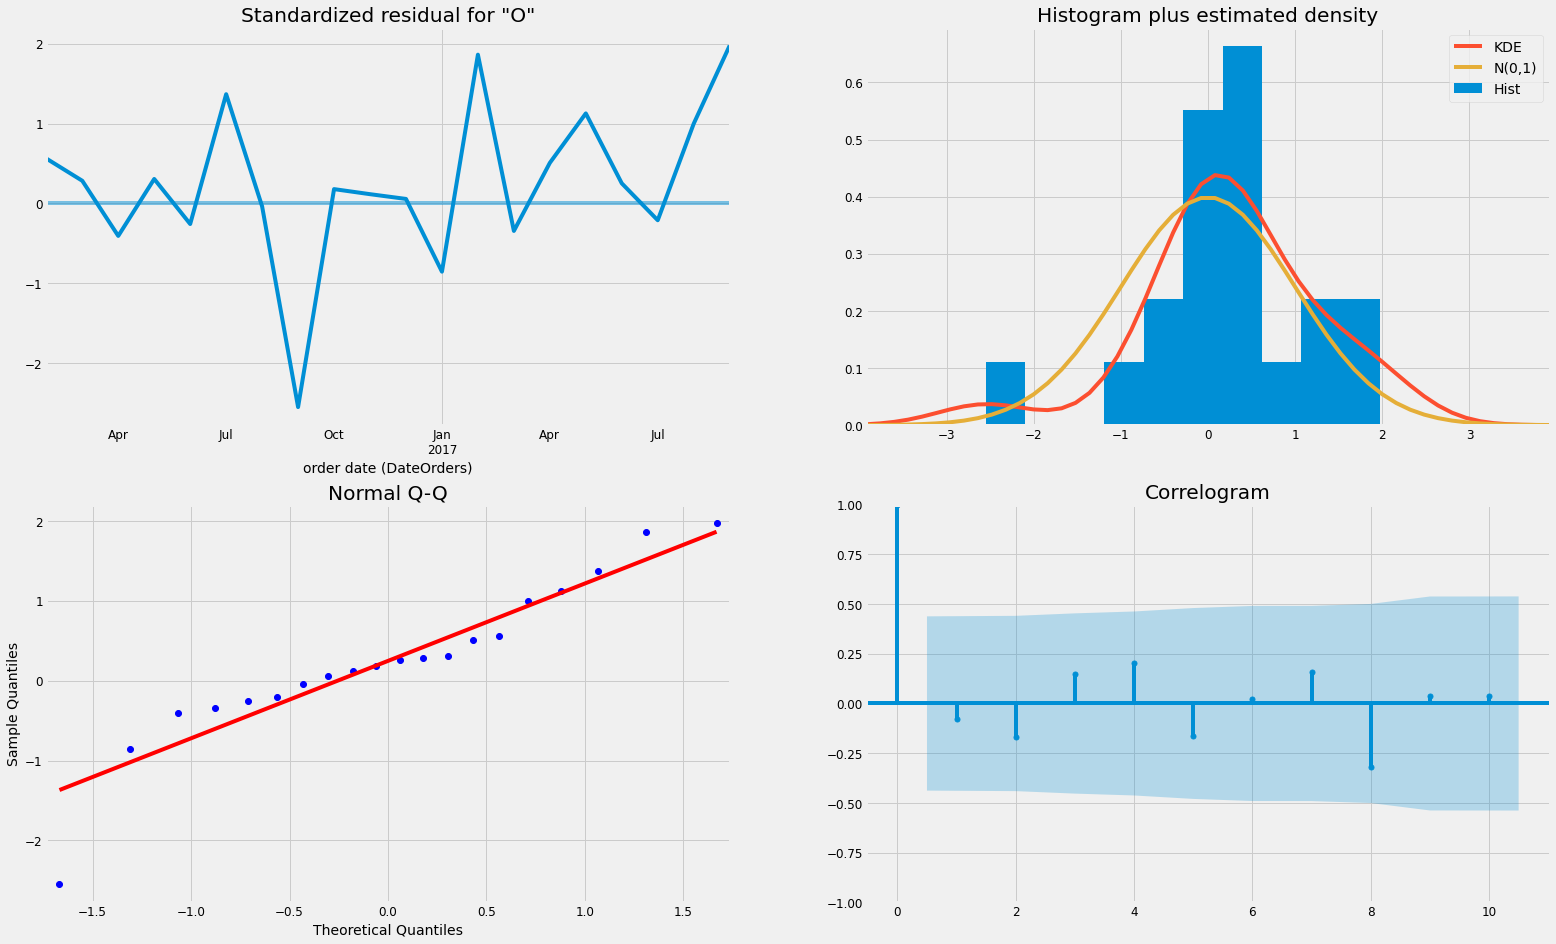

In [15]:
results.plot_diagnostics(figsize=(24,15))
plt.show()

Validating forecasts
To help us understand the forecast accruracy by comparing prediction to the real sales data as we set forecasts to start at year 2017

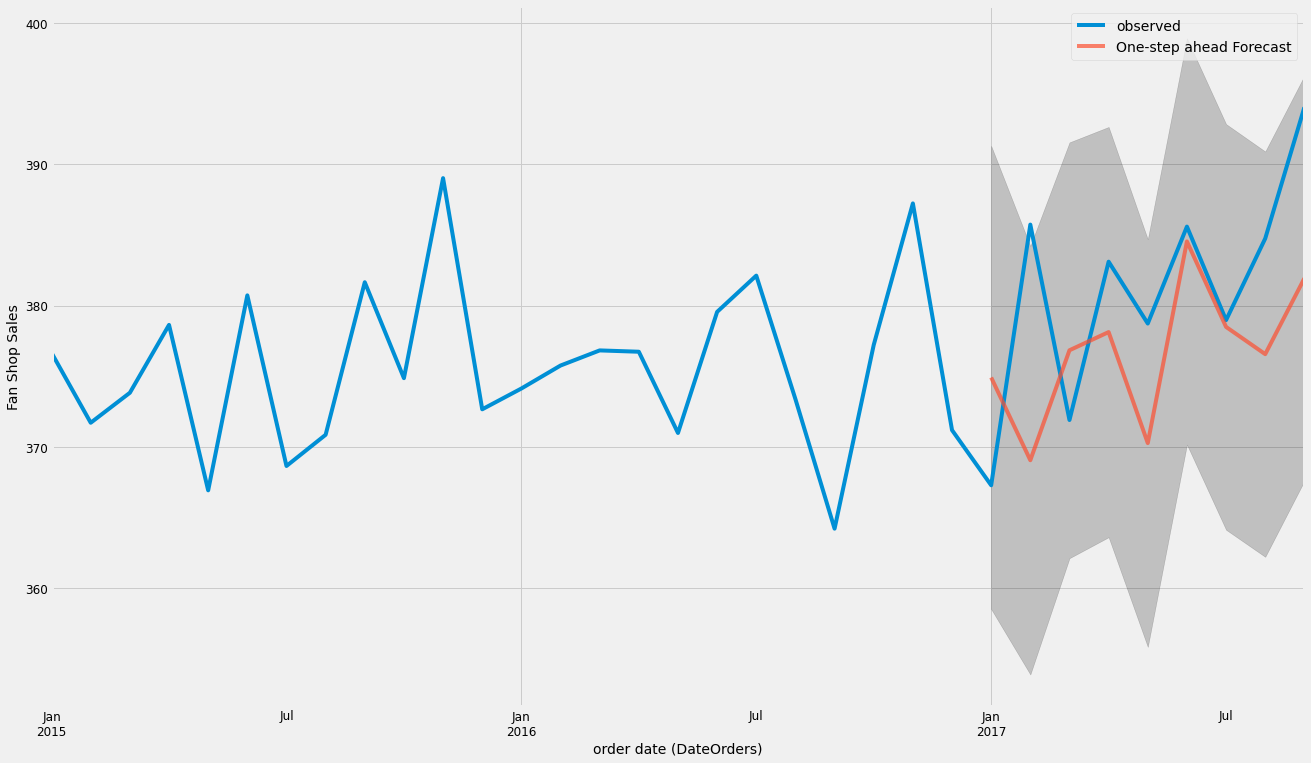

In [21]:
# The line plot showing the forecasting data vs. the observed (actual) sales in 2017. Overall, first half of 2017 showing more fluctuation than the last 2 years and its peak seems showing up earlier. 
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 12))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('order date (DateOrders)')
ax.set_ylabel('Fan Shop Sales')
plt.legend()
plt.show()

In [22]:
# Calculating the MAE, MSE and RSME to measure the forecast accuracy 
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mae = abs(y_forecasted - y_truth).mean()
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Absolute Error of our forecasts is {}'.format(round(mse, 2)))
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Absolute Error of our forecasts is 74.62
The Mean Squared Error of our forecasts is 74.62


In [23]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 8.64


Producing and visualizing forecast

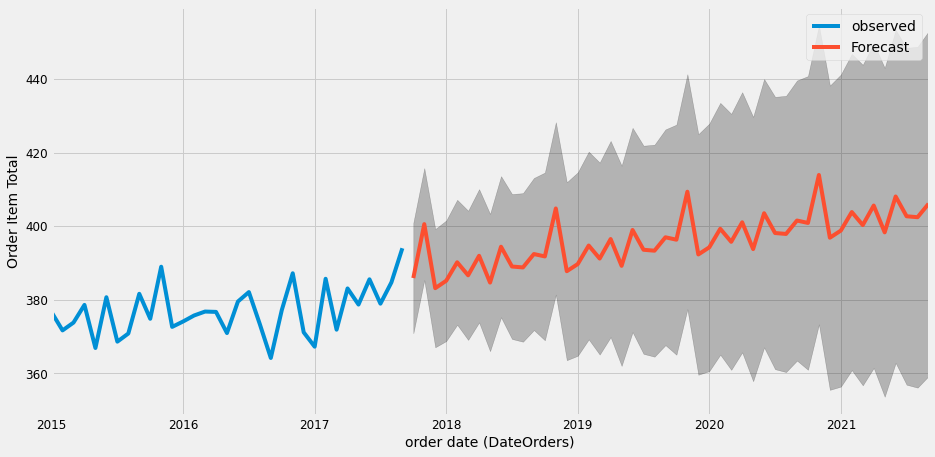

In [19]:
# Producing future 4 years (48 months) forecast and visualize the past 3 years demand and future forecast in one plot
pred_uc = results.get_forecast(steps=48)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('order date (DateOrders)')
ax.set_ylabel('Order Item Total')
plt.legend()
plt.show()